In [5]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#Read in the data

df = pd.read_csv(r'C:\Users\zebra\Downloads\movies.csv')

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [6]:
# Lets look at the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [7]:
# Lets see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [8]:
#Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int)


In [23]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        June  
1   58853106   Columbia Pictures    104.0        July  
2  538375067           Lucasfilm    124.0        June  
3   83453539  Paramount Pictures     88.0        July  
4   39846344      Orion Pictures     98.0        July

In [10]:
#create correct year column

df['yearcorrect'] = df['released'].astype(str).str[:4]

In [11]:
df.sort_values(by=['gross'], inplace = False, ascending=False)

name     rating      genre  year  \
6663  Star Wars: Episode VII - The Force Awakens      PG-13     Action  2015   
7244                      Avengers: Infinity War      PG-13     Action  2018   
7480                               The Lion King         PG  Animation  2019   
6653                              Jurassic World      PG-13     Action  2015   
6043                                The Avengers      PG-13     Action  2012   
...                                          ...        ...        ...   ...   
5033                            Loving Annabelle  Not Rated      Drama  2006   
7667                                   Tee em el        NaN     Horror  2020   
3045                                     Titanic      PG-13      Drama  1997   
7445                           Avengers: Endgame      PG-13     Action  2019   
5445                                      Avatar      PG-13     Action  2009   

                               released  score      votes          director  \
6663  December 18, 2015 (United States)    7.8   876000.0       J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0     Anthony Russo   
7480      July 19, 2019 (United States)    6.9   222000.0       Jon Favreau   
6653      June 12, 2015 (United States)    7.0   593000.0   Colin Trevorrow   
6043        May 4, 2012 (United States)    8.0  1300000.0       Joss Whedon   
...                                 ...    ...        ...               ...   
5033             May 24, 2007 (Germany)    6.3    12000.0  Katherine Brooks   
7667    August 19, 2020 (United States)    5.7        7.0      Pereko Mosia   
3045  December 19, 1997 (United States)    7.8  1100000.0     James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0     Anthony Russo   
5445  December 18, 2009 (United States)    7.8  1100000.0     James Cameron   

                  writer               star        country     budget  \
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
7480      Jeff Nathanson      Donald Glover  United States  260000000   
6653          Rick Jaffa        Chris Pratt  United States  150000000   
6043         Joss Whedon  Robert Downey Jr.  United States  220000000   
...                  ...                ...            ...        ...   
5033    Katherine Brooks         Erin Kelly  United States    1000000   
7667        Pereko Mosia   Siyabonga Mabaso   South Africa          0   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
5445       James Cameron    Sam Worthington  United States  237000000   

           gross                company  runtime yearcorrect  
6663  2069521700              Lucasfilm    138.0        Dece  
7244  2048359754         Marvel Studios    149.0        Apri  
7480  1670727580   Walt Disney Pictures    118.0        July  
6653  1670516444     Universal Pictures    124.0        June  
6043  1518815515         Marvel Studios    143.0        May   
...          ...                    ...      ...         ...  
5033           0      Big Easy Pictures     77.0        May   
7667           0            PK 65 Films    102.0        Augu  
3045 -2147483648  Twentieth Century Fox    194.0        Dece  
7445 -2147483648         Marvel Studios    181.0        Apri  
5445 -2147483648  Twentieth Century Fox    162.0        Dece  

[7668 rows x 16 columns]

In [12]:
pd.set_option('display.max_rows', None)

In [13]:
#Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [ ]:
#Budget high correlation
#company high correlation




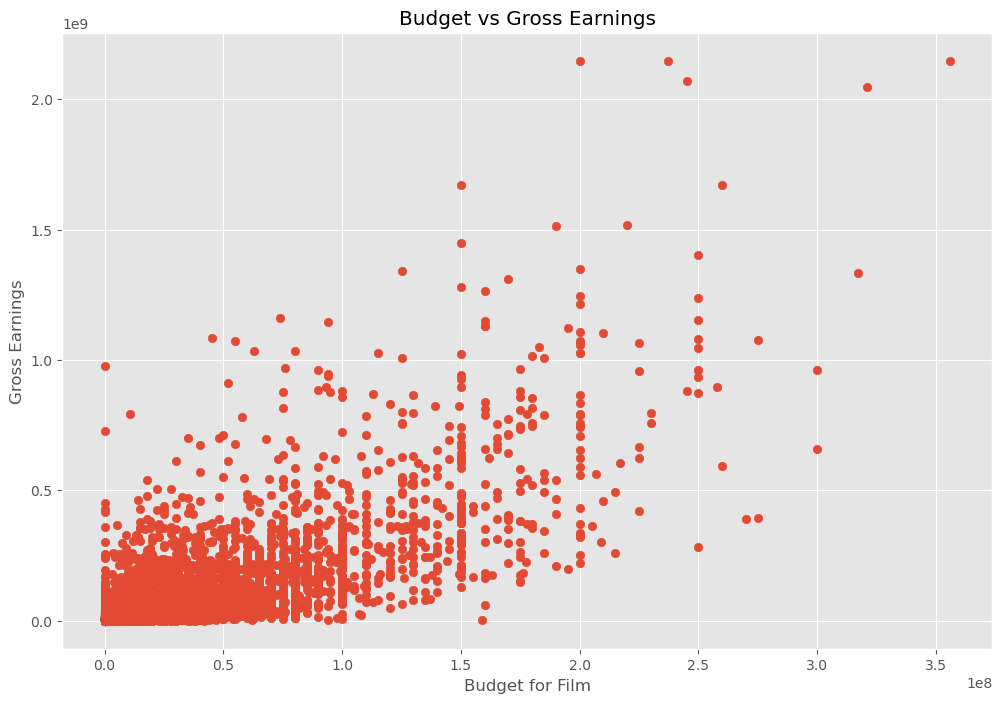

In [14]:
# Scatter plot with budget vs gross
df['gross'] = df['gross'].apply(lambda x: abs(x) if x < 0 else x)

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.ylabel('Gross Earnings')

plt.xlabel('Budget for Film')
plt.show()

In [33]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        June  
1   58853106   Columbia Pictures    104.0        July  
2  538375067           Lucasfilm    124.0        June  
3   83453539  Paramount Pictures     88.0        July  
4   39846344      Orion Pictures     98.0        July

<Axes: xlabel='budget', ylabel='gross'>

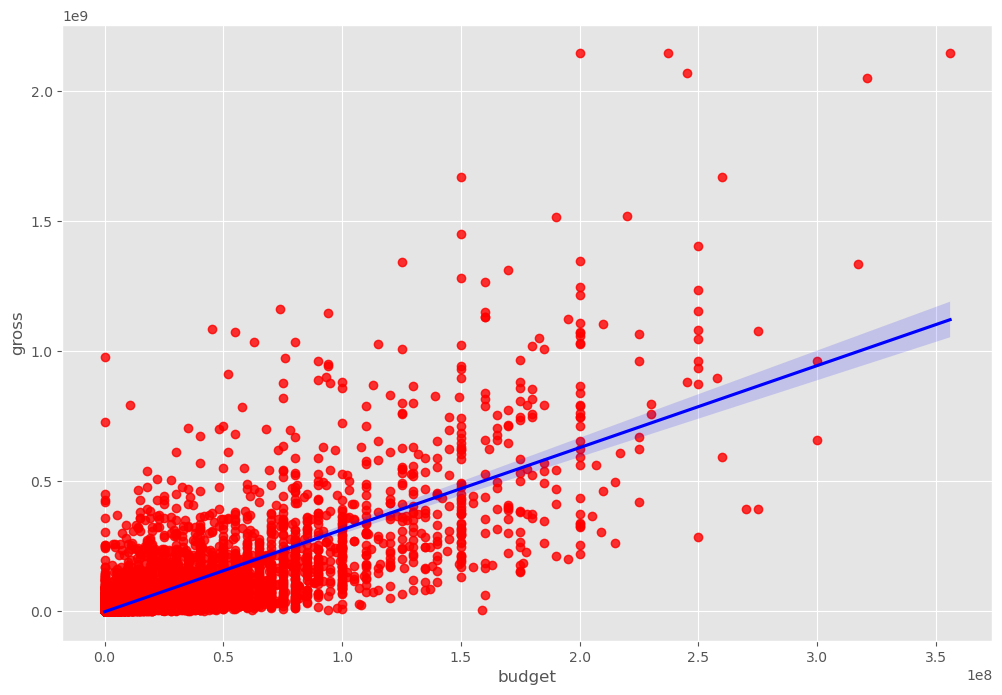

In [35]:
#plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross',data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [ ]:
# Lets start looking at correlation

In [38]:
df.corr(numeric_only=True)

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.264977  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.187530  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.637010  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.754893  0.269510
gross    0.264977  0.187530  0.637010  0.754893  1.000000  0.245376
runtime  0.120811  0.399451  0.309212  0.269510  0.245376  1.000000

In [40]:
df.corr(method='pearson',numeric_only=True)

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.264977  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.187530  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.637010  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.754893  0.269510
gross    0.264977  0.187530  0.637010  0.754893  1.000000  0.245376
runtime  0.120811  0.399451  0.309212  0.269510  0.245376  1.000000

In [42]:
df.corr(method='kendall',numeric_only=True)

year     score     votes    budget     gross   runtime
year     1.000000  0.067652  0.331465  0.209304  0.216595  0.097184
score    0.067652  1.000000  0.300115 -0.005194  0.090626  0.283611
votes    0.331465  0.300115  1.000000  0.439902  0.560118  0.198240
budget   0.209304 -0.005194  0.439902  1.000000  0.541955  0.176016
gross    0.216595  0.090626  0.560118  0.541955  1.000000  0.176912
runtime  0.097184  0.283611  0.198240  0.176016  0.176912  1.000000

In [43]:
df.corr(method='spearman',numeric_only=True)

year     score     votes    budget     gross   runtime
year     1.000000  0.099045  0.469829  0.291152  0.314681  0.142977
score    0.099045  1.000000  0.428138 -0.007500  0.132569  0.399857
votes    0.469829  0.428138  1.000000  0.604627  0.752265  0.290159
budget   0.291152 -0.007500  0.604627  1.000000  0.716816  0.246748
gross    0.314681  0.132569  0.752265  0.716816  1.000000  0.256783
runtime  0.142977  0.399857  0.290159  0.246748  0.256783  1.000000

In [ ]:
#High correlation between budget and gross
# I was right

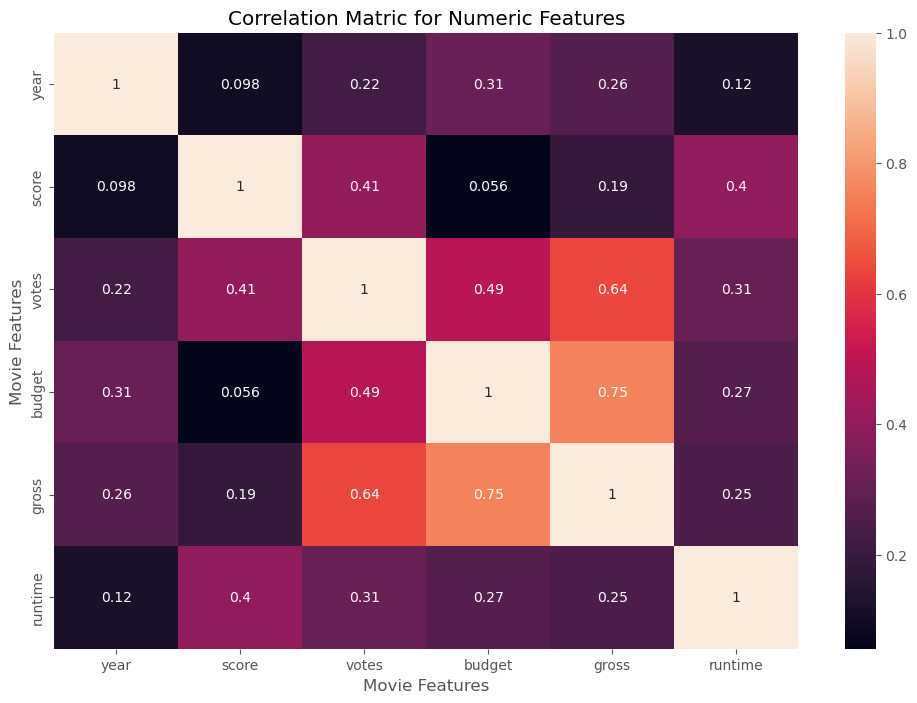

In [46]:
correlation_matrix = df.corr(method='pearson',numeric_only=True)

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matric for Numeric Features')

plt.ylabel('Movie Features')

plt.xlabel('Movie Features')
plt.show()


plt.show()

In [47]:
# Look at Company

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        June  
1   58853106   Columbia Pictures    104.0        July  
2  538375067           Lucasfilm    124.0        June  
3   83453539  Paramount Pictures     88.0        July  
4   39846344      Orion Pictures     98.0        July

In [15]:
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

name  rating  genre  year  released  score      votes  director  writer  \
0     6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1     5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2     5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3      286       4      4  1980      1492    7.7   221000.0      1301    2000   
4     1027       6      4  1980      1543    7.3   108000.0      1054     521   
5     2109       6     10  1980      2502    6.4   123000.0      2528    4362   
6     5574       6      0  1980      1771    7.9   188000.0      1412     838   
7     4436       6      3  1980       699    8.2   330000.0      1829    1769   
8     5281       4      0  1980      1753    6.8   101000.0      2306    1979   
9     6213       6      3  1980      2286    7.0    10000.0      2864     423   
10     463       4      0  1980       674    6.1    18000.0       357    3985   
11    5920       4      1  1980      2987    7.3    54000.0      1199    1832   
12    4315       4      1  1980       626    5.3    30000.0      2352    2333   
13    4084       6      6  1980      3211    7.7    49000.0      2388    2327   
14    1687       6      5  1980      1543    7.1    37000.0       318     520   
15    5024       4      6  1980      3021    7.2    27000.0      1243    3548   
16    1900       6      6  1980      2286    6.6    21000.0        49     735   
17      92       4      4  1980       699    6.9    29000.0       514    3262   
18    5865       6     10  1980      1108    6.8    66000.0      1374    2104   
19    5189       6      4  1980       626    6.8    26000.0      2561     556   
20    1387       6      5  1980       945    6.5    20000.0      2891    4451   
21    2451       6      1  1980       160    6.8    14000.0      1892    2926   
22    5845       4      0  1980       281    6.7    22000.0       744    4192   
23    7445       4      8  1980       585    5.3    12000.0      2371    3528   
24    7127       4      6  1980      1913    6.4    14000.0      1153      12   
25     346       6     10  1980       773    6.9    33000.0      1583    3234   
26    3263       6      4  1980      2059    6.5     5100.0      2433    2483   
27    4442       4      0  1980       281    5.0     4100.0      1282      33   
28     980       6      5  1980      1771    7.2    17000.0      2673    4386   
29     362       6      5  1980       886    6.2    22000.0      2151    3326   
30    3796       4      4  1980      3296    7.1     8900.0      2811      83   
31    4373       6     10  1980      1467    5.4    16000.0      2143    4455   
32    4987       4      0  1980       342    5.3    15000.0      1041    1587   
33    1103       4      6  1980       160    6.1      604.0      1644     958   
34    4785       4      4  1980       699    6.7     9100.0      1225    3136   
35    4362       6      4  1980      2818    6.2    24000.0      1091    3107   
36    6008       6      4  1980      2452    6.3     4300.0       855    1358   
37    3721       6      4  1980      2965    6.0    11000.0      1598    3642   
38    6102       4      6  1980       699    5.9     4000.0      2296    3826   
39    1244       4      3  1980      2195    7.5    17000.0      1884    4201   
40    6748       4      7  1980      3101    6.3     5700.0      1403     518   
41     927       4      6  1980      1588    7.9    13000.0       335    2252   
42    6644       6      0  1980      1836    7.1     9000.0      2314    2543   
43    7305       6      3  1980       169    6.6    11000.0       186    1682   
44    5504       6     10  1980      3042    4.8     2000.0      1978     151   
45    1152       6      4  1980      1467    6.1    12000.0      2804    4298   
46    6094       6      0  1980      1705    5.3     3900.0      1934    3357   
47    5578       6     10  1980      2775    4.6     3900.0      2836    4344   
48    6360       4      0  1980      

In [3]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized



name  rating  genre  year  released  score      votes  director  writer  \
0     6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1     5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2     5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3      286       4      4  1980      1492    7.7   221000.0      1301    2000   
4     1027       6      4  1980      1543    7.3   108000.0      1054     521   
...    ...     ...    ...   ...       ...    ...        ...       ...     ...   
7663  3705      -1      6  2020      2964    3.1       18.0      1500    2289   
7664  1678      -1      4  2020      1107    4.7       36.0       774    2614   
7665  4717      -1      6  2020       193    5.7       29.0      2061    2683   
7666  2843      -1      6  2020      2817    NaN        NaN      1184    1824   
7667  5394      -1     10  2020       391    5.7        7.0      2165    3344   

      star  country      budget        gross  company  runtime  
0     1047       54  19000000.0   46998772.0     2319    146.0  
1      327       55   4500000.0   58853106.0      731    104.0  
2     1745       55  18000000.0  538375067.0     1540    124.0  
3     2246       55   3500000.0   83453539.0     1812     88.0  
4      410       55   6000000.0   39846344.0     1777     98.0  
...    ...      ...         ...          ...      ...      ...  
7663  2421       55      7000.0          NaN       -1     90.0  
7664  1886       55         NaN          NaN      539     90.0  
7665  2040       55     58750.0          NaN      941      NaN  
7666   450       55     15000.0          NaN       -1    120.0  
7667  2463       44         NaN          NaN     1787    102.0  

[7668 rows x 15 columns]

In [22]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        June  
1   58853106   Columbia Pictures    104.0        July  
2  538375067           Lucasfilm    124.0        June  
3   83453539  Paramount Pictures     88.0        July  
4   39846344      Orion Pictures     98.0        July

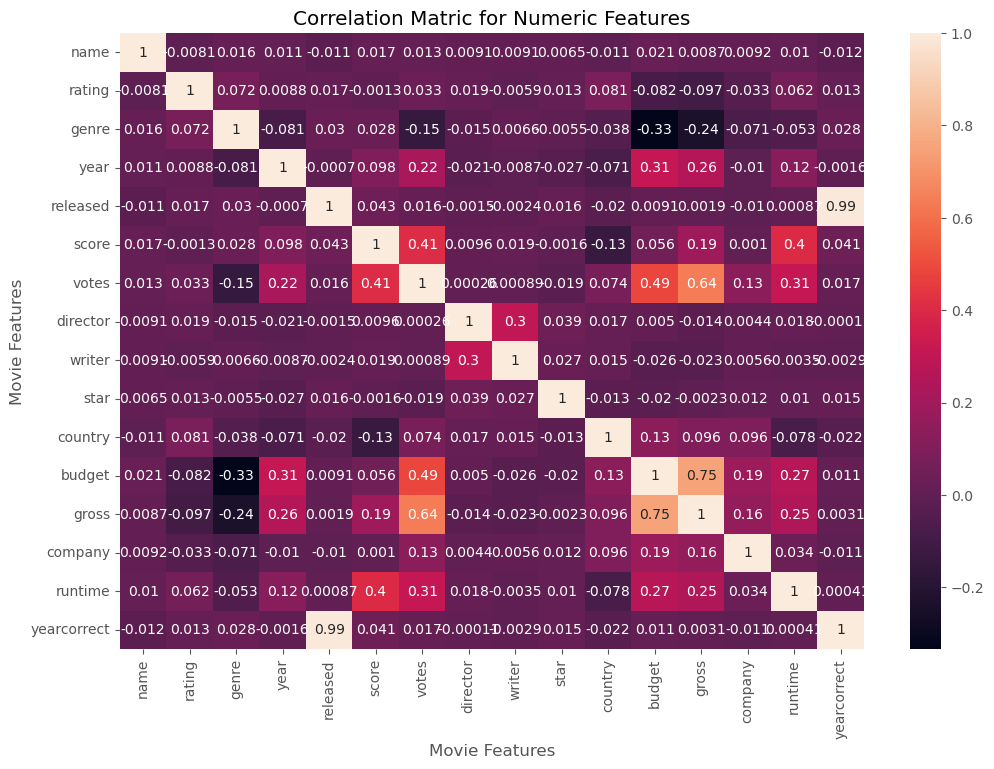

In [17]:
correlation_matrix = df_numerized.corr(method='pearson',numeric_only=True)

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matric for Numeric Features')

plt.ylabel('Movie Features')

plt.xlabel('Movie Features')
plt.show()


plt.show()

In [18]:
df_numerized.corr()


name    rating     genre      year  released     score  \
name         1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
rating      -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre        0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
year         0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released    -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
score        0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes        0.013088  0.033225 -0.145307  0.222945  0.016097  0.409182   
director     0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer       0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star         0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
country     -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
budget       0.020548 -0.081939 -0.334021  0.309212  0.009145  0.055665   
gross        0.008666 -0.096924 -0.236812  0.264977  0.001944  0.187530   
company      0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.001030   
runtime      0.010392  0.062145 -0.052711  0.120811  0.000868  0.399451   
yearcorrect -0.011725  0.013475  0.028397 -0.001562  0.993694  0.040993   

                votes  director    writer      star   country    budget  \
name         0.013088  0.009079  0.009081  0.006472 -0.010737  0.020548   
rating       0.033225  0.019483 -0.005921  0.013405  0.081244 -0.081939   
genre       -0.145307 -0.015258  0.006567 -0.005477 -0.037615 -0.334021   
year         0.222945 -0.020795 -0.008656 -0.027242 -0.070938  0.309212   
released     0.016097 -0.001478 -0.002404  0.015777 -0.020427  0.009145   
score        0.409182  0.009559  0.019416 -0.001609 -0.133348  0.055665   
votes        1.000000  0.000260  0.000892 -0.019282  0.073625  0.486862   
director     0.000260  1.000000  0.299067  0.039234  0.017490  0.004976   
writer       0.000892  0.299067  1.000000  0.027245  0.015343 -0.025911   
star        -0.019282  0.039234  0.027245  1.000000 -0.012998 -0.019952   
country      0.073625  0.017490  0.015343 -0.012998  1.000000  0.131720   
budget       0.486862  0.004976 -0.025911 -0.019952  0.131720  1.000000   
gross        0.637010 -0.014076 -0.022519 -0.002343  0.096420  0.754893   
company      0.133204  0.004404  0.005646  0.012442  0.095548  0.186474   
runtime      0.309212  0.017624 -0.003511  0.010174 -0.078412  0.269510   
yearcorrect  0.017337 -0.000105 -0.002892  0.015406 -0.022277  0.010544   

                gross   company   runtime  yearcorrect  
name         0.008666  0.009211  0.010392    -0.011725  
rating      -0.096924 -0.032943  0.062145     0.013475  
genre       -0.236812 -0.071067 -0.052711     0.028397  
year         0.264977 -0.010431  0.120811    -0.001562  
released     0.001944 -0.010474  0.000868     0.993694  
score        0.187530  0.001030  0.399451     0.040993  
votes        0.637010  0.133204  0.309212     0.017337  
director    -0.014076  0.004404  0.017624    -0.000105  
writer      -0.022519  0.005646 -0.003511    -0.002892  
star        -0.002343  0.012442  0.010174     0.015406  
country      0.096420  0.095548 -0.078412    -0.022277  
budget       0.754893  0.186474  0.269510     0.010544  
gross        1.000000  0.158509  0.245376     0.003061  
company      0.158509  1.000000  0.034402    -0.010726  
runtime      0.245376  0.034402  1.000000     0.000410  
yearcorrect  0.003061 -0.010726  0.000410     1.000000

In [19]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.008666
             company        0.009211
             runtime        0.010392
             yearcorrect   -0.011725
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [20]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.334021
budget       genre         -0.334021
gross        genre         -0.236812
genre        gross         -0.236812
             votes         -0.145307
votes        genre         -0.145307
score        country       -0.133348
country      score         -0.133348
gross        rating        -0.096924
rating       gross         -0.096924
             budget        -0.081939
budget       rating        -0.081939
year         genre         -0.081261
genre        year          -0.081261
country      runtime       -0.078412
runtime      country       -0.078412
company      genre         -0.071067
genre        company       -0.071067
year         country       -0.070938
country      year          -0.070938
runtime      genre         -0.052711
genre        runtime       -0.052711
             country       -0.037615
country      genre         -0.037615
rating       company       -0.032943
company      rating        -0.032943
star         year          -0.027242
y

In [21]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes        gross          0.637010
gross        votes          0.637010
             budget         0.754893
budget       gross          0.754893
released     yearcorrect    0.993694
yearcorrect  released       0.993694
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64